In [74]:
pip install pandas numpy matplotlib scikit-learn seaborn xgboost shap

   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   -- ------------------------------------ 41.0/545.2 kB 991.0 kB/s eta 0:00:01
   -- ------------------------------------ 41.0/545.2 kB 991.0 kB/s eta 0:00:01
   ----- --------------------------------- 71.7/545.2 kB 438.9 kB/s eta 0:00:02
   -------- ----------------------------- 122.9/545.2 kB 654.9 kB/s eta 0:00:01
   ---------- --------------------------- 153.6/545.2 kB 706.2 kB/s eta 0:00:01
   ---------------- --------------------- 235.5/545.2 kB 758.5 kB/s eta 0:00:01
   ------------------- ------------------ 286.7/545.2 kB 842.9 kB/s eta 0:00:01
   ----------------------- -------------- 337.9/545.2 kB 807.1 kB/s eta 0:00:01
   --------------------------- ---------- 389.1/545.2 kB 867.0 kB/s eta 0:00:01
   --------------------------- ---------- 389.1/545.2 kB 867.0 kB/s eta 0:00:01
   --------------------------- ---------- 389.1/545.2 kB 867.0 kB/s eta 0:00:01
   --------------------------- ---------- 399.4/5

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import shap
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import auc

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [19]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [6]:
filepath1 = r"C:\Users\USER\Downloads\Sample Sales Data\test_Y3wMUE5_7gLdaTN.csv"
filepath1

'C:\\Users\\USER\\Downloads\\Sample Sales Data\\test_Y3wMUE5_7gLdaTN.csv'

In [8]:
df1 = pd.read_csv(filepath1)
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Task 1: Exploratory Data Analysis

## Data Summary

In [21]:
# Shape of the dataset
print(f"Dataset contains {df1.shape[0]} rows and {df1.shape[1]} columns.\n")

# Data types and non-null counts
print(df1.info())

# Summary statistics for numerical features
df1.describe()

Dataset contains 367 rows and 12 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


## Checking for missing values

In [22]:
# Count and percentage of missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({'Missing Values': missing, 'Percent (%)': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percent (%)', ascending=False)

print("Missing Value Summary:")
display(missing_df)

Missing Value Summary:


,Missing Values,Percent (%)


## Checking for outliers

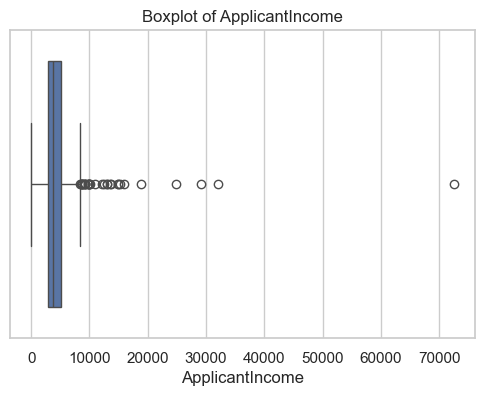

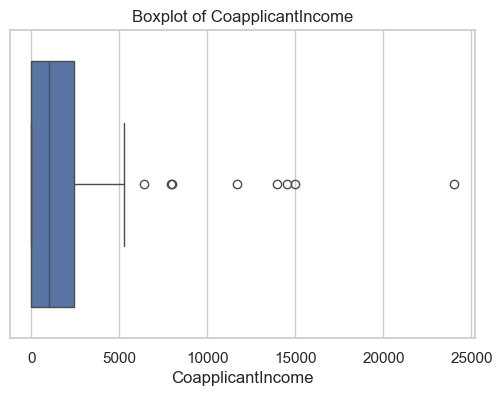

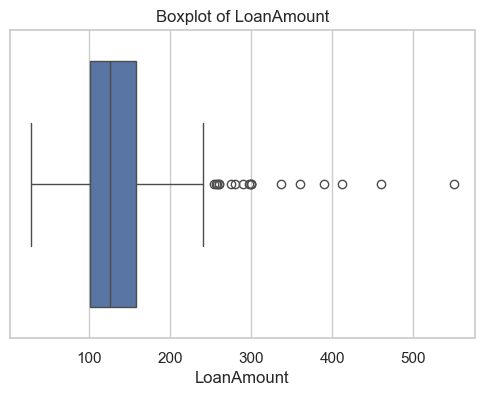

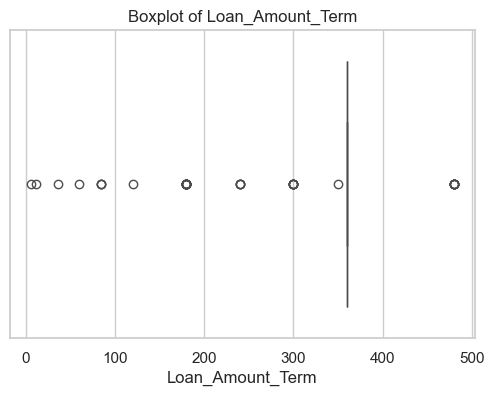

In [24]:
# Boxplots to visually detect outliers
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df1, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

## Class imbalance

C:\Users\USER\AppData\Local\Temp\ipykernel_22632\1544643949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='Loan_Status', palette='Set2')


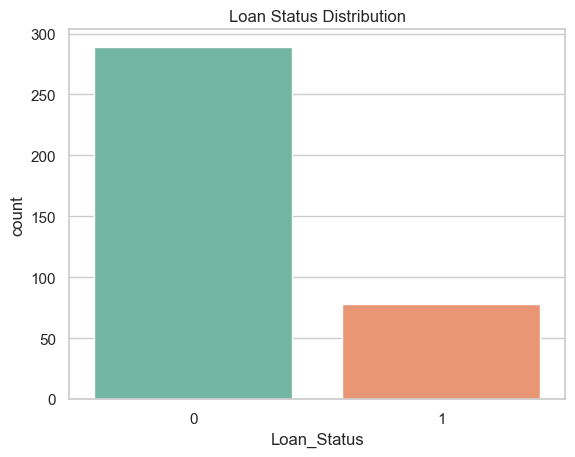

Loan_Status
0    0.787466
1    0.212534
Name: proportion, dtype: float64


In [89]:
if 'Loan_Status' in df1.columns:
    sns.countplot(data=df1, x='Loan_Status', palette='Set2')
    plt.title("Loan Status Distribution")
    plt.show()

    print(df1['Loan_Status'].value_counts(normalize=True))
else:
    print("Target variable 'Loan_Status' not found.")

## Correlation Heat Map

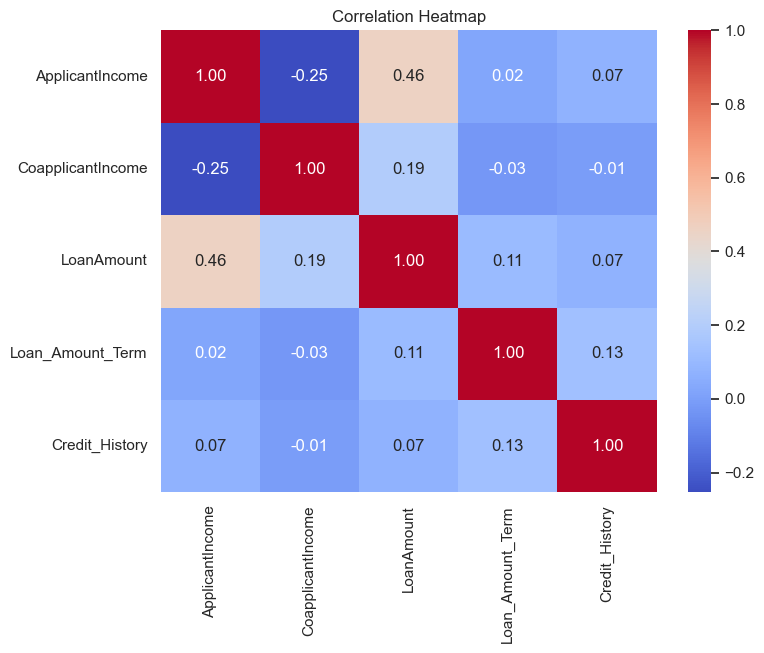

In [90]:
# Correlation matrix
corr = df1[numerical_columns + ['Credit_History']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Distribution Plot

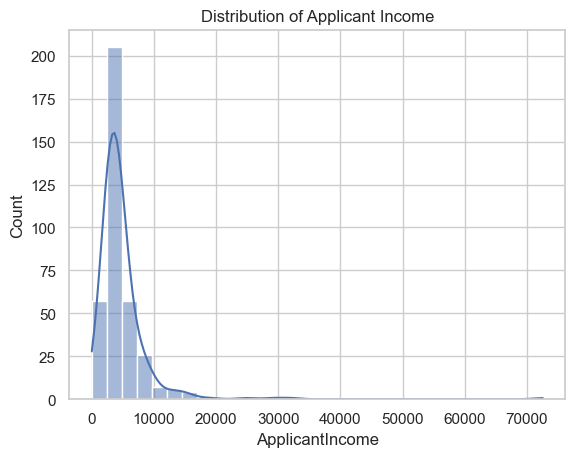

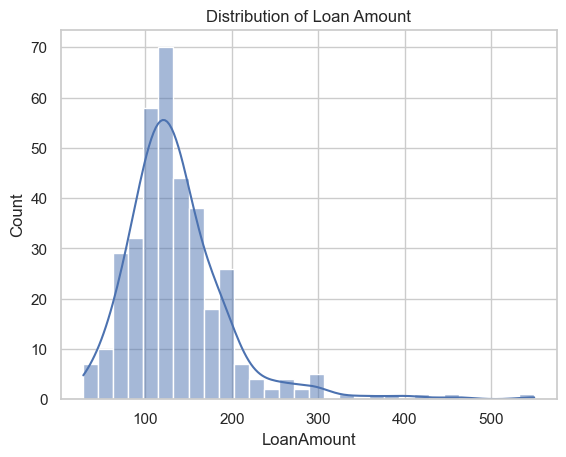

In [31]:
# Distribution of ApplicantIncome
sns.histplot(df1['ApplicantIncome'], kde=True, bins=30)
plt.title("Distribution of Applicant Income")
plt.show()

# Distribution of LoanAmount
sns.histplot(df1['LoanAmount'], kde=True, bins=30)
plt.title("Distribution of Loan Amount")
plt.show()


## Ralationship Plot (Income vs LoanAmount)

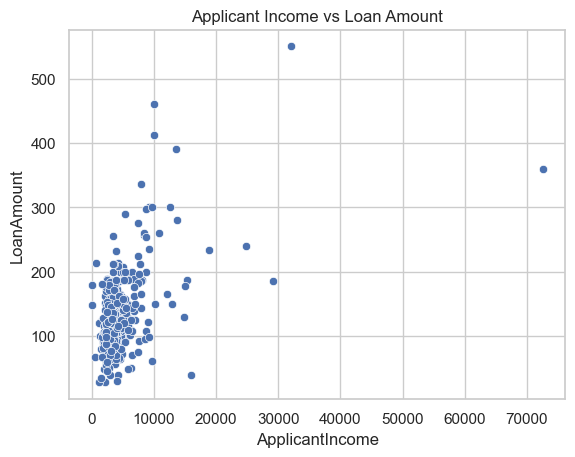

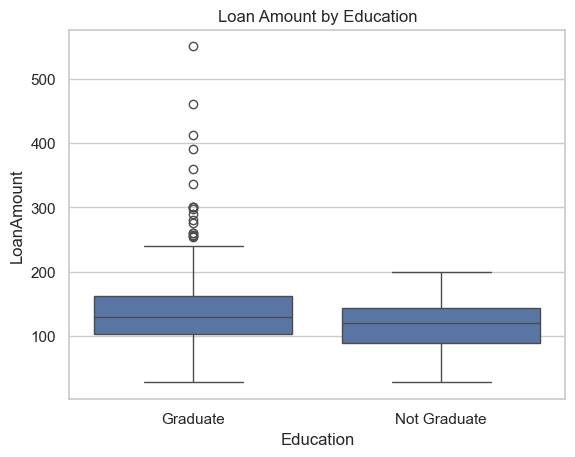

In [32]:
# Income vs LoanAmount
sns.scatterplot(data=df1, x='ApplicantIncome', y='LoanAmount')
plt.title("Applicant Income vs Loan Amount")
plt.show()

# Boxplot: LoanAmount by Education
sns.boxplot(data=df1, x='Education', y='LoanAmount')
plt.title("Loan Amount by Education")
plt.show()

# Task2: Feature Engineering

## Handling missing values

In [36]:
# Categorical
#df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)
#df1['Dependents'].fillna(df1['Dependents'].mode()[0], inplace=True)
#df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0], inplace=True)

# Numerical
#df1['LoanAmount'].fillna(df1['LoanAmount'].median(), inplace=True)
#df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].median(), inplace=True)
#df1['Credit_History'].fillna(df1['Credit_History'].mode()[0], inplace=True)

## Handling Outliers

In [39]:
def cap_outliers(col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df1[col] = np.where(df1[col] > upper, upper,
               np.where(df1[col] < lower, lower, df1[col]))

for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    cap_outliers(col)

## Creating new feature

In [40]:
# Debt-to-Income Ratio
df1['TotalIncome'] = df1['ApplicantIncome'] + df1['CoapplicantIncome']
df1['Debt_Income_Ratio'] = df1['LoanAmount'] / df1['TotalIncome']

In [42]:
#Payment-to-Inflow Ratio

# Monthly income & payment estimate
df1['MonthlyIncome'] = df1['TotalIncome'] / 12
df1['MonthlyLoanPayment'] = df1['LoanAmount'] / df1['Loan_Amount_Term']
df1['Payment_Income_Ratio'] = df1['MonthlyLoanPayment'] / df1['MonthlyIncome']

In [44]:
## Loan term category
df1['Loan_Term_Category'] = df1['Loan_Amount_Term'].apply(lambda x: 'Short' if x <= 180 else 'Long')

## Encoding Categorical Variables

In [47]:
label_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Term_Category']

le = LabelEncoder()
for col in label_cols:
    df1[col] = le.fit_transform(df1[col])
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Debt_Income_Ratio,MonthlyIncome,MonthlyLoanPayment,Payment_Income_Ratio,Loan_Term_Category
0,LP001015,1,1,0,0,0,5720.0,0.0,110.0,360.0,1.0,2,5720.0,0.019231,476.666667,0.305556,0.000641,0
1,LP001022,1,1,1,0,0,3076.0,1500.0,126.0,360.0,1.0,2,4576.0,0.027535,381.333333,0.350000,0.000918,0
2,LP001031,1,1,2,0,0,5000.0,1800.0,208.0,360.0,1.0,2,6800.0,0.030588,566.666667,0.577778,0.001020,0
3,LP001035,1,1,2,0,0,2340.0,2546.0,100.0,360.0,1.0,2,4886.0,0.020467,407.166667,0.277778,0.000682,0
4,LP001051,1,0,0,1,0,3276.0,0.0,78.0,360.0,1.0,2,3276.0,0.023810,273.000000,0.216667,0.000794,0


In [54]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'TotalIncome',
       'Debt_Income_Ratio', 'MonthlyIncome', 'MonthlyLoanPayment',
       'Payment_Income_Ratio', 'Loan_Term_Category', 'Loan_Status'],
      dtype='object')

# Task3: Model Building

## Features and Target

In [91]:
# Example dummy target if not available
df1['Loan_Status'] = np.random.choice([0, 1], size=len(df1), p=[0.75, 0.25])  # simulate 25% risk

X = df1.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df1['Loan_Status']

## Train-Test_Split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Training and Evaluation of Models

In [96]:
#Logistic Regression Pipeline
logreg_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000))
])

logreg_pipeline.fit(X_train, y_train)
y_pred_lr = logreg_pipeline.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, logreg_pipeline.predict_proba(X_test)[:, 1]))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        55
           1       0.28      0.37      0.32        19

    accuracy                           0.59        74
   macro avg       0.52      0.52      0.51        74
weighted avg       0.63      0.59      0.61        74

ROC AUC: 0.5387559808612441


In [97]:
# Random Forest Pipeline
rf_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:, 1]))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        55
           1       0.50      0.47      0.49        19

    accuracy                           0.74        74
   macro avg       0.66      0.66      0.66        74
weighted avg       0.74      0.74      0.74        74

ROC AUC: 0.6526315789473685


In [112]:
# XGBoost Pipeline
xgb_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb_pipeline.predict_proba(X_test)[:, 1]))

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [06:35:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        55
           1       0.29      0.26      0.28        19

    accuracy                           0.65        74
   macro avg       0.52      0.52      0.52        74
weighted avg       0.64      0.65      0.64        74

ROC AUC: 0.6038277511961724


## Cross_Validation Scores

In [110]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Example for Random Forest
logreg_scores = cross_val_score(
    logreg_pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1
)
print("LogRef Cross-Validation AUC Scores:", logreg_scores)
print("Mean AUC:", logreg_scores.mean())

LogRef Cross-Validation AUC Scores: [0.51483254 0.46985646 0.53939394 0.53737374 0.46464646]
Mean AUC: 0.5052206273258905


In [100]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest
rf_scores = cross_val_score(
    rf_pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1
)
print("RF Cross-Validation AUC Scores:", rf_scores)
print("Mean AUC:", rf_scores.mean())

RF Cross-Validation AUC Scores: [0.56315789 0.45215311 0.56060606 0.64141414 0.43535354]
Mean AUC: 0.5305369484316852


In [115]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost
xgb_scores = cross_val_score(
    xgb_pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1
)
print("XGB Cross-Validation AUC Scores:", xgb_scores)
print("Mean AUC:", xgb_scores.mean())

XGB Cross-Validation AUC Scores: [0.61818182 0.42870813 0.51515152 0.5969697  0.45454545]
Mean AUC: 0.5227113237639553


## Plotting ROC Curves

In [102]:
# Predict probabilities

#Generate ROC Curve for Each Model
y_prob_lr = logreg_pipeline.predict_proba(X_test)[:, 1]
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

# ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

# AUC scores
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

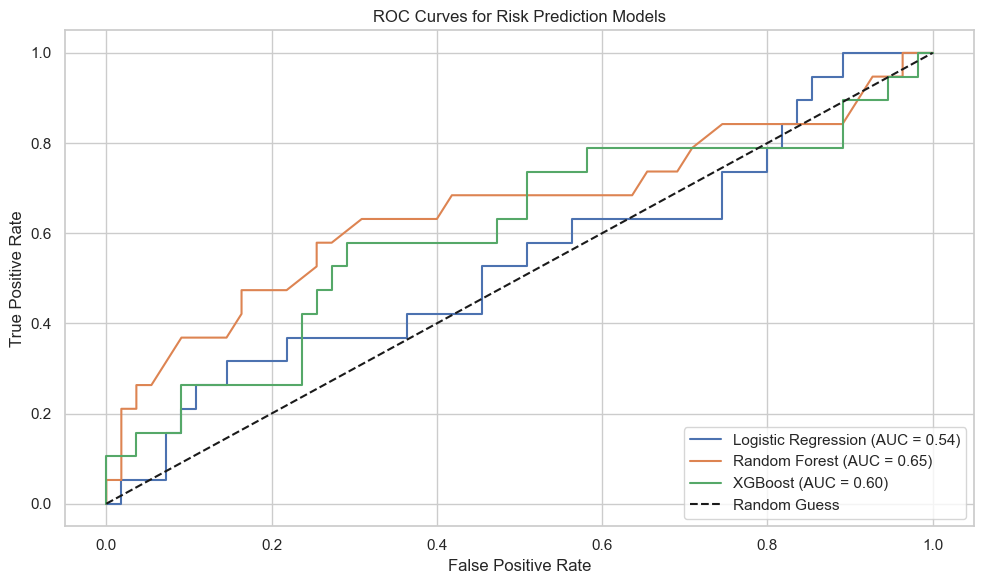

In [114]:
# Plotting All ROC Curves Together

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Risk Prediction Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Bar Chart for Metrics Summary

In [104]:
# Store scores
summary = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
}
metrics_df1 = pd.DataFrame(summary)

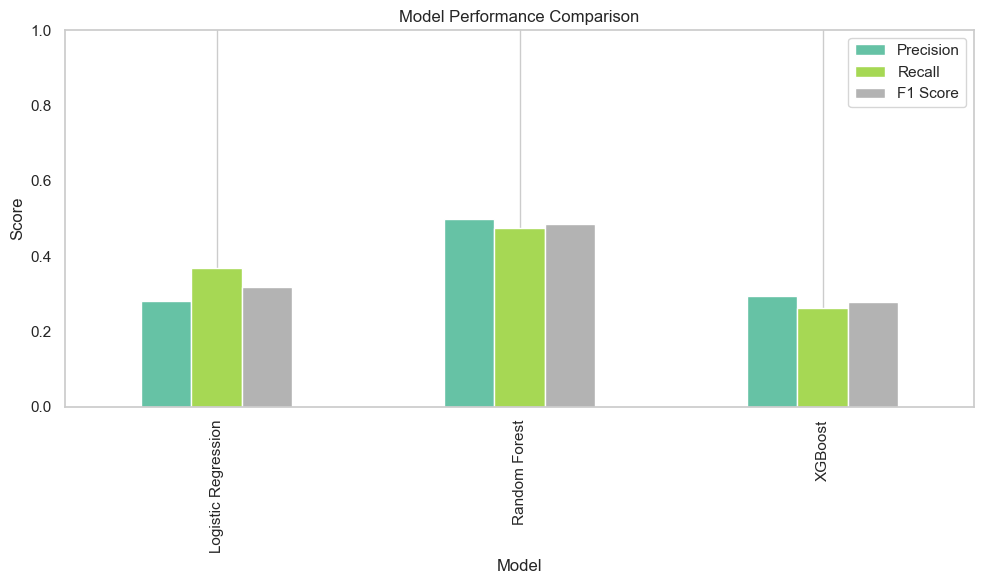

In [105]:
# Plotting Bar Charts
metrics_df1.set_index('Model')[['Precision', 'Recall', 'F1 Score']].plot(
    kind='bar', figsize=(10, 6), ylim=(0, 1), colormap='Set2'
)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Model Interpretation using SHAP (SHapley Additive exPlanations)

In [106]:
#xgboost only
xgb_pipeline.named_steps

{'smote': SMOTE(random_state=42),
 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, ...)}

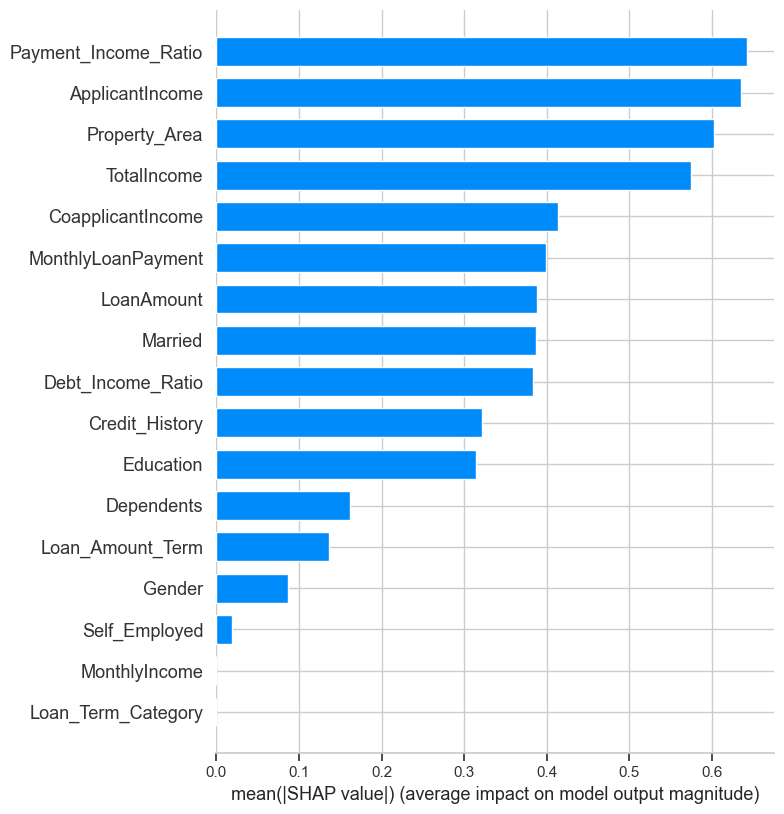

In [107]:
# Get the fitted XGBoost model from the pipeline
xgb_model_only = xgb_pipeline.named_steps['model']

# If X_test is already preprocessed (i.e., encoded & scaled), use it directly
X_test_df1 = pd.DataFrame(X_test, columns=X_test.columns)

# Initialize SHAP
explainer = shap.Explainer(xgb_model_only)

# Get SHAP values for the test set
shap_values = explainer(X_test_df1)

# Plot summary (bar chart of feature importance)
shap.summary_plot(shap_values, X_test_df1, plot_type="bar")

In [108]:
# rf model only
rf_pipeline.named_steps

{'smote': SMOTE(random_state=42),
 'model': RandomForestClassifier(class_weight='balanced', random_state=42)}

<Figure size 640x480 with 0 Axes>

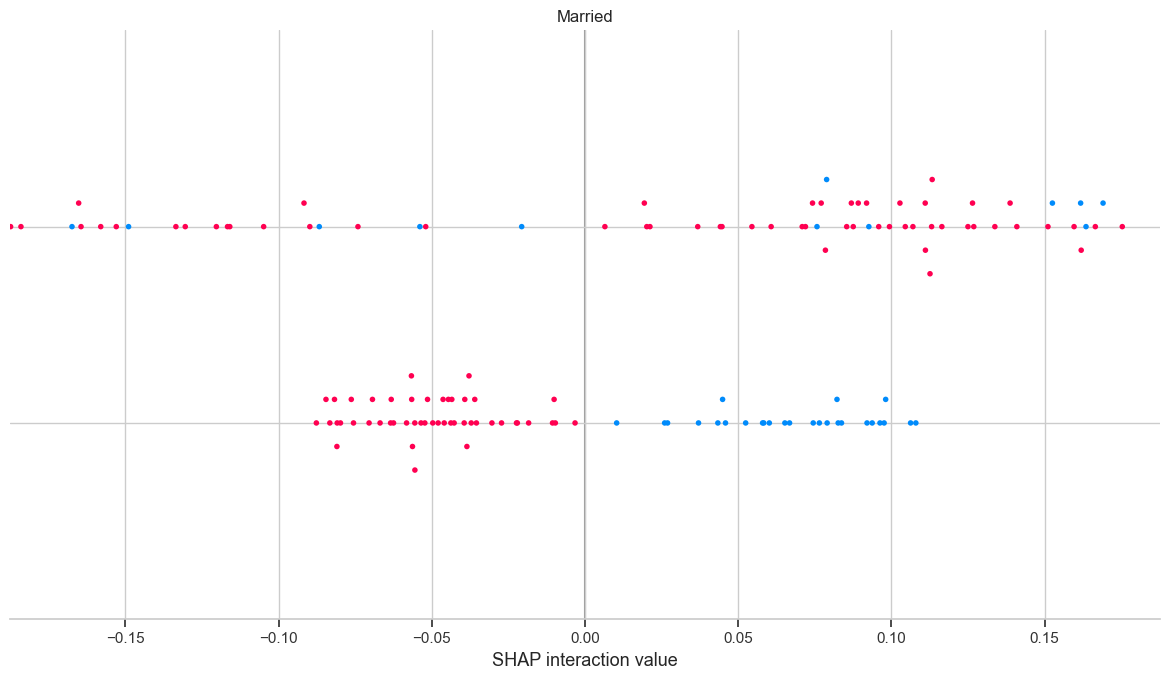

In [109]:
# Get the fitted XGBoost model from the pipeline
rf_model_only = rf_pipeline.named_steps['model']

# If X_test is already preprocessed (i.e., encoded & scaled), use it directly
X_test_df1 = pd.DataFrame(X_test, columns=X_test.columns)

# Initialize SHAP
explainer = shap.Explainer(rf_model_only)

# Get SHAP values for the test set
shap_values = explainer(X_test_df1)

# Plot summary (bar chart of feature importance)
shap.summary_plot(shap_values, X_test_df1, plot_type="bar")

In [9]:
filepath2 = r"C:\Users\USER\Downloads\Sample Sales Data\train_u6lujuX_CVtuZ9i.csv"
filepath2

'C:\\Users\\USER\\Downloads\\Sample Sales Data\\train_u6lujuX_CVtuZ9i.csv'

In [10]:
df2 = pd.read_csv(filepath2)
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
df = pd.merge(df1, df2, on = 'Loan_ID')
df.head()

,Loan_ID,Gender_x,Married_x,Dependents_x,Education_x,Self_Employed_x,ApplicantIncome_x,CoapplicantIncome_x,LoanAmount_x,Loan_Amount_Term_x,...,Dependents_y,Education_y,Self_Employed_y,ApplicantIncome_y,CoapplicantIncome_y,LoanAmount_y,Loan_Amount_Term_y,Credit_History_y,Property_Area_y,Loan_Status
